# 激活函数

## 各激活函数曲线对比

常用激活函数：

    tf.sigmoid()

    tf.tanh()

    tf.nn.relu()

    tf.nn.softplus()

    tf.nn.softmax()

    tf.nn.dropout()
    
    tf.nn.elu()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [5]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [6]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x)+np.exp(-x))

In [7]:
def relu(x):
    return [max(xi,0) for xi in x]

In [21]:
def elu(x,a=1):
    y = []
    for xi in x:
        if xi >= 0:
            y.append(xi)
        else:
            y.append(a*(np.exp(xi)-1))
    return y

In [22]:
def softplus(x):
    return np.log(1+np.exp(x))

In [23]:
def derivative_f(func,input,dx=1e-6):
    y = [derivative(func,x,dx) for x in input]
    return y

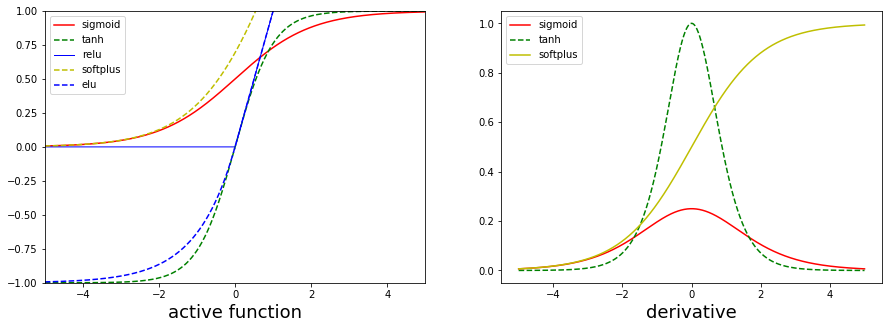

In [24]:
x = np.linspace(-5,5,1000)

flg = plt.figure(figsize=(15,5))
ax1 = flg.add_subplot(1,2,1)
ax1.axis([-5,5,-1,1])
plt.xlabel(r'active function',fontsize=18)
ax1.plot(x,sigmoid(x),'r-',label='sigmoid')
ax1.plot(x,tanh(x),'g--',label='tanh')
ax1.plot(x,relu(x),'b-',lw=1,label='relu')
ax1.plot(x,softplus(x),'y--',label='softplus')
ax1.plot(x,elu(x),'b--',label='elu')
ax1.legend()
ax2 = flg.add_subplot(1,2,2)
plt.xlabel(r'derivative',fontsize=18)
ax2.plot(x,derivative_f(sigmoid,x),'r-',label='sigmoid')
ax2.plot(x,derivative_f(tanh,x),'g--',label='tanh')
ax2.plot(x,derivative_f(softplus,x),'y-',label='softplus')
ax2.legend()
plt.show()

## 各激活函数优缺点

<b>sigmoid函数</b>

    优点：在于输出映射在（0，1）范围内，单调连续，适合用作输出层，求导容易

    缺点：一旦输入落入饱和区，一阶导数接近0，就可能产生梯度消失的情况

<b>tanh函数</b>

    优点：输出以0为中心，收敛速度比sigmoid函数要快

    缺点：存在梯度消失问题

<b>relu函数</b>

    优点：目前最受欢迎的激活函数，在x<0时，硬饱和，在x>0时，导数为1，所以在x>0时保持梯度不衰减，从而可以缓解梯度消失的问题，能更快收敛，并提供神经网络的稀疏表达能力

    缺点：随着训练的进行，部分输入或落入硬饱和区，导致无法更新权重，称为‘神经元死亡’

<b>elu函数</b>

    优点：有一个非零梯度，这样可以避免单元消失的问题
    
    缺点：计算速度比relu和它的变种慢，但是在训练过程中可以通过更快的收敛sua年度来弥补
    
<b>softplus函数</b>

    该函数对relu做了平滑处理，更接近脑神经元的激活模型

<b>softmax函数</b>

    除了用于二分类还可以用于多分类，将各个神经元的输出映射到（0,1空间）
    
<b>dropout函数</b>

    tf.nn.dropout(x,keep_prob,noise_shape=None,seed=None,name=None)
    
    一个神经元以概率keep_prob决定是否被抑制，如果被抑制，神经元的输出为0，如果不被抑制，该神经元将被放大到原来的1/keep_prob倍，默认情况下，每个神经元是否被抑制是相互独立的
    
<b>一般规则</b>

    当输入数据特征相差明显时，用tanh效果很好，当特征相差不明显时用sigmoid效果比较好，sigmoid和tanh作为激活函数需要对输入进行规范化，否则激活后的值进入平坦区，而relu不会出现这种情况，有时也不需要输入规范化，因此85%-90%的神经网络会使用relu函数

# 损失函数

损失函数一般分为二分类损失函数、多分类损失函数和回归问题损失函数

二分类损失函数有:0-1损失、hinge损失、LogisticCrossEntropyLoss

多分类损失有:SoftmaxCrossEntropyLoss

回归问题损失函数有：均方差误差或根均方差误差、平均绝对值误差和huber损失函数

## 0- 1损失

对于二分类问题，Y= {-1,1},我们希望$sign f(x_i,\theta) = y_i$,最自然的损失是0-1损失，即$$L_{0-1}(f,y)=1_{fy<=0}$$

该损失函数能够直观地刻画分类的错误率，但是由于其非凸，非光滑使得算法很难对该函数进行优化，下面将总结0-1损失的二个代理函数：HingeLoss,LogsiticCrossEntropyLoss

## HingeLoss

定义:$$L_{hinge} = max(0,1-fy)$$

Hinge损失函数是0-1损失函数相对紧的凸上界，且当fy >=1时，该函数不对其做任何惩罚，Hinge损失在fy=1处不可导，因此不能用梯度下降法进行优化，而是用次梯度下降法

## LogisticCrossEntropyLoss

对数似然函数：$$L(\theta(x)) = -\sum_{i=1}^Ny_i * \log\theta(x_i)+(1-y_i)\log(1-\theta(x_i))$$
注：$\theta (x)为sigmoid函数$

## SoftmaxCrossEntropyLoss

损失函数：
$$logits_{ij} = \frac{e^{logits_{ij}}}{\sum_{j=0}^{numclass-1}e^{logits_{ij}}}$$
$$loss_{i} = -\sum_{j=0}^{numclass-1}label_{ij}\log (logits_{ij})$$

## 均方差

$$L_{square}(f,y) = {(f-y)}^2$$

当预测值距离真实值越大时，平方损失函数的惩罚力度越大，因此它对异常点比较敏感，为了解决这个问题，可以使用平均绝对损失函数

## 平均绝对误差

$$L_{absolute}(f,y) = |f - y|$$

绝对损失函数相当于在做中值回归，相比于做均值回归的平方损失函数对异常点的鲁棒性更好一些，当时有个问题是在f=y时无法求导，综合考虑可导性和对异常点的鲁棒性，采用Huber损失函数

## HuberLoss

Huber Loss 是一个用于回归问题的带参损失函数, 优点是能增强平方误差损失函数(MSE, mean square error)对离群点的鲁棒性
当预测偏差小于 δ 时，它采用平方误差
当预测偏差大于 δ 时，采用的线性误差

$$f(x) = 
\begin{cases}
    \frac{1}{2}{(y-f(x))}^2 & |y - f(x)| <= \xi \\
    \xi (|y-f(x)| - \frac{1}{2} \xi) & otherwise
\end{cases}\tag{4-4}$$

![SegmentLocal](./datasets/huber_loss_change.gif "segment") 

注：上图来源于https://www.cnblogs.com/nowgood/p/Huber-Loss.html

# 附:tensorflow中的损失函数

## sigmoid_cross_entropy_with_logits函数

    tf.nn.sigmoid_cross_entropy_with_logits(_sentinel=None,labels=None,logits=None)

    该函数不仅可以用于二分类，也可以用于多分类，例如：判断图片中是否包含几种动物中的一种或多种

### 二分类logstic损失函数梯度推导

二项逻辑斯蒂回归模型是一种分类模型，由条件概率p(y|x)表示，形式未参数化的逻辑斯蒂分布，这里的变量X为实数，随机变量y取值为1或0，逻辑斯蒂模型条件概率分布如下：$$p(y=1|x) = \frac{\exp(w{\bullet}x+b)}{1+\exp(w{\bullet}x+b)}$$
$$p(y=0|x) = \frac{1}{1+\exp(w{\bullet}x+b)}$$
假设$$p(y = 1|x) = \theta(x),p(y=0|x) = 1 - \theta(x)$$ 
损失函数：$$L(\theta(x)) = -\prod_{i=1}^N[\theta(x_i)]^{y_i}[1-\theta(x_i)]^{1-y_i}$$
对数似然函数：$$L(\theta(x)) = -\sum_{i=1}^Ny_i * \log\theta(x_i)+(1-y_i)\log(1-\theta(x_i))$$
求$L(\theta(x))$的极大值，得到w的估计值,由于$L(\theta(x))$为凸函数，可以直接求损失函数的一阶偏导：
$$\frac{\delta{L}}{\delta{w_j}} = -\sum_{i=1}^N[y_i*\frac{1}{\theta(x_i)} - (1-y_i)*\frac{1}{1-\theta(x_i)}] *\frac{\delta{\theta(x)}}{\delta{w_j}}$$
由于$\frac{\delta{\theta(x)}}{\delta{w}} = \theta(x_i) * (1 - \theta(x_i))*x_j^i$
得到：$$\frac{\delta{L}}{\delta{w_j}} = -\sum_{i=1}^N(y_i-\theta(x_i))*x_j^i$$

## weighted_cross_entropy_with_logits函数

    tf.nn.weighted_cross_entropy_with_logits(targets,logits,pos_weight,name=None)
    
    pos_weight正样本的一个系数
    
    该函数在sigmoid_cross_entropy_with_logits函数的基础上为每个正样本添加了一个权重，其损失函数如下：
    
$$loss_{ij} = -[post_{weight}p_{ij}\log p_{ij}+(1-p_{ij})\log (1-p_{ij})]$$

## softmax_cross_entropy_with_logits函数

    tf.nn.softmax_cross_entropy_with_logits(_sentinel,labels,logits,name)
    
    适用于每个类别相互独立且排斥的情况，例如，判断的图片只能属于一个种类而不能同时包含多个种类
    
    损失函数：
$$logits_{ij} = \frac{e^{logits_{ij}}}{\sum_{j=0}^{numclass-1}e^{logits_{ij}}}$$
$$loss_{i} = -\sum_{j=0}^{numclass-1}label_{ij}\log (logits_{ij})$$

## sparse_softmax_cross_entropy_with_logits函数

    tf.nn.sparse_softmax_cross_entropy_with_logits(_sentinel,labels,logits,name)
    
    该函数与softmax_cross_entropy_with_logits的唯一区别在于labels,该函数的标签要求排他性的即只有一个正确类型，labels的形状要求是[batch_size]而值必须是从0开始编码的int32或int64，而且范围是[0,num_class]，该函数没用过